# Карьерный Цех — задание для аналитиков от 4 октября 2021 — Medium

### Задание №3

In [29]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [30]:
# Создаем датафрейм на основе данных из csv-файла
df = pd.read_csv("case_ctr.csv",sep=";",index_col="Unnamed: 0")

In [31]:
# Обзор загруженных в датафрейм данных
df.head()

,user_id,session_id,click_id,experimentVariant
1,4299b8c9c50c3e4e8a067f448426463e,08f9c3b0e2ff8da7bad6cc200fa735a2,56bcee80ce68ddc58c178a63288965b2,1
2,863829e0fc8e0dcd88f44c6a63db836a,d0ebf6ddaa8702e6de4e46854a1136ff,b209c6b14e91606a99d637ff6eb74cc6,1
3,640af3312483bea44b8159a8caaf0b3d,838c4a718830b5f1ac7be5e70745ff47,3f3d510c709ae5d9bae0331fcf776f3a,1
4,43de481cae63944b81db6fd5567a12bb,8f36aead1ceafb3e67f9957a7765549e,da73306047217a73a6ee0ea7477f2ad7,0
5,b84dd1a6c3df2e08eb7bef496cdf6d39,09799cdf1394b0e4b86ace899b7f218e,6e4b93932be600a5536c291888996037,1


In [32]:
# Информация по типам и наличию данных в столбцах

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            10000 non-null  object
 1   session_id         10000 non-null  object
 2   click_id           7655 non-null   object
 3   experimentVariant  10000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 390.6+ KB


In [33]:
NA=df['user_id'].count()-df['click_id'].count()
NA

2345

## Считаем CTR c учетом первых сессий пользователей

In [34]:
# Создание двух разных датафреймов на основе соответствующего идентификатора эксперимента 0 - как было раньше,
# 1- после того, как поменяли местами иконки "Маркет" и "Карты" над строкой поиска.

df_old = df[(df['experimentVariant'] == 0)]
df_exp = df[(df['experimentVariant'] == 1)]

In [35]:
df_old.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5112 entries, 4 to 9997
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            5112 non-null   object
 1   session_id         5112 non-null   object
 2   click_id           3951 non-null   object
 3   experimentVariant  5112 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 199.7+ KB


In [36]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4888 entries, 1 to 10000
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            4888 non-null   object
 1   session_id         4888 non-null   object
 2   click_id           3704 non-null   object
 3   experimentVariant  4888 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 190.9+ KB


In [37]:
CTR_old = df_old['click_id'].count()/len(df_old)*100
print("CTR: %.1f" %(CTR_old),"%")

CTR: 77.3 %


In [38]:
CTR_exp = df_exp['click_id'].count()/len(df_exp)*100
print("CTR: %.1f" %(CTR_exp),"%")

CTR: 75.8 %


In [39]:
delt = CTR_exp-CTR_old
print("CTR: %.1f" %(delt),"%")

CTR: -1.5 %


In [40]:
#df_second=df.copy(deep=True)
#
#df_second["user_id"]=0
#df_second["session_id"]=0
#df_second["click_id"]=0
#df_second["experimentVariant"]=0
#df_second['index']=0
#
#df_old_second=df_old.copy(deep=True)
#df_exp_second=df_exp.copy(deep=True)

In [41]:
#z = []
#for i in range (len(df)):
#    master=df.iloc[i]
#    
#    for j in range (len(df)-i):
#        if(df.user_id.iloc[j+i]==master.user_id):
#            Z.append(df.user_id.iloc[j+i])
#            for k in range (0,len(z)):
#                if(df.user_id.iloc[j+i]==z[k]):
#                    print('lllll')
#                else:
#                    print('vvvl')
#                    df_second.iloc[i]=df.iloc[j+i]
#                    df_second['index'].iloc[i]=df.index[j+i]
#            print(df_second['index'].iloc[i])
#            
#    #print(df_second.iloc[i])
##df_second_notZero=df_second.drop(df_second[df_second['user_id'] == 0].index)

## Строим графики с частотами кликов

### Контрольный датасет

In [42]:
df['click_id']=df['click_id'].isnull()

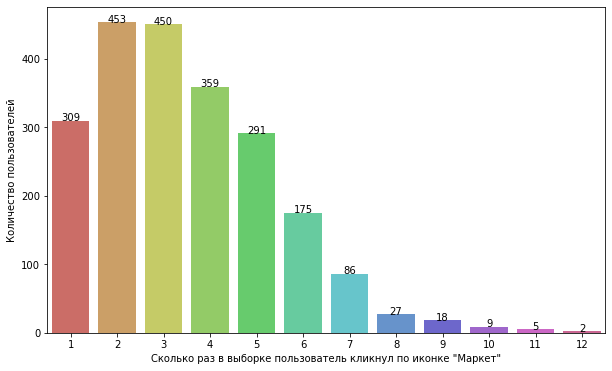

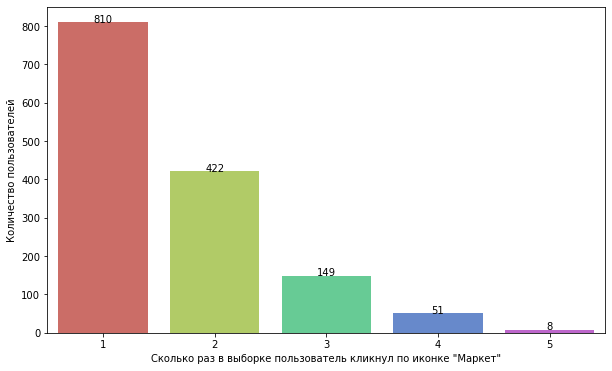

In [43]:
# Удаляем сессии без клика по "Маркет"
for i in range(len(df)):
    if (df['click_id'].iloc[i] != True):
        df['click_id'].iloc[i] = 0
    else:
        df['click_id'].iloc[i] = 1  

df_notNaN=df.drop(df[df['click_id'] == 1].index)
df_notNaN['one']=1

groups_notNaN = df_notNaN.groupby('user_id').aggregate(sum).reset_index()
groups_plot_notNaN = groups_notNaN.groupby('one').count().reset_index()

plt.figure(figsize=(10,6))
p = sns.countplot(x='one',data=groups_notNaN, palette='hls')
p.set_ylabel('Количество пользователей')
p.set_xlabel('Сколько раз в выборке пользователь кликнул по иконке "Маркет"')

for index,row in groups_plot_notNaN.iterrows():
    p.text(row.one-1,row.experimentVariant,round(row.experimentVariant,1),color="black",ha="center")
plt.show()

# Оставляем только сессии без клика по "Маркет"
df_NaN=df.drop(df[df['click_id'] == 0].index)
df_NaN['one']=1

groups_NaN = df_NaN.groupby('user_id').aggregate(sum).reset_index()
groups_plot_NaN = groups_NaN.groupby('one').count().reset_index()

plt.figure(figsize=(10,6))
p = sns.countplot(x='one',data=groups_NaN, palette='hls')
p.set_ylabel('Количество пользователей')
p.set_xlabel('Сколько раз в выборке пользователь кликнул по иконке "Маркет"')

for index,row in groups_plot_NaN.iterrows():
    p.text(row.one-1,row.experimentVariant,round(row.experimentVariant,1),color="black",ha="center")
plt.show()

In [44]:
df_old['click_id']=df_old['click_id'].isnull()

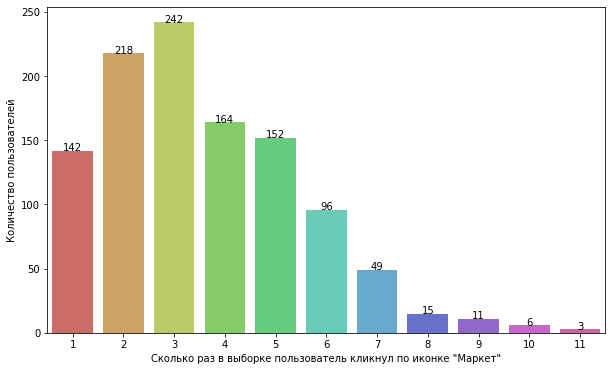

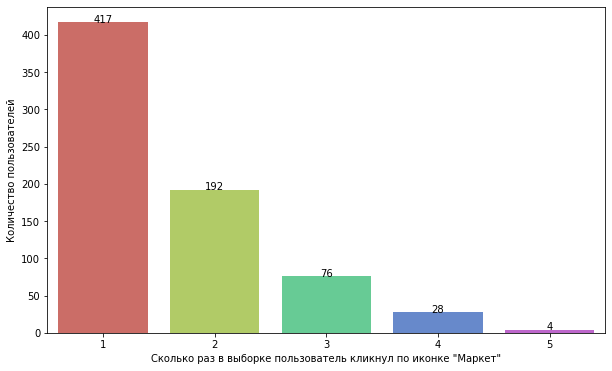

In [45]:
# Удаляем сессии без клика по "Маркет"
for i in range(len(df_old)):
    if (df_old['click_id'].iloc[i] != True):
        df_old['click_id'].iloc[i] = 0
    else:
        df_old['click_id'].iloc[i] = 1  

df_old_notNaN=df_old.drop(df_old[df_old['click_id'] == 1].index)
df_old_notNaN['one']=1

groups_old_notNaN = df_old_notNaN.groupby('user_id').aggregate(sum).reset_index()
groups_old_plot_notNaN = groups_old_notNaN.groupby('one').count().reset_index()

plt.figure(figsize=(10,6))
p = sns.countplot(x='one',data=groups_old_notNaN, palette='hls')
p.set_ylabel('Количество пользователей')
p.set_xlabel('Сколько раз в выборке пользователь кликнул по иконке "Маркет"')

for index,row in groups_old_plot_notNaN.iterrows():
    p.text(row.one-1,row.experimentVariant,round(row.experimentVariant,1),color="black",ha="center")
plt.show()

# Оставляем только сессии без клика по "Маркет"
df_old_NaN=df_old.drop(df_old[df_old['click_id'] == 0].index)
df_old_NaN['one']=1

groups_old_NaN = df_old_NaN.groupby('user_id').aggregate(sum).reset_index()
groups_old_plot_NaN = groups_old_NaN.groupby('one').count().reset_index()

plt.figure(figsize=(10,6))
p = sns.countplot(x='one',data=groups_old_NaN, palette='hls')
p.set_ylabel('Количество пользователей')
p.set_xlabel('Сколько раз в выборке пользователь кликнул по иконке "Маркет"')

for index,row in groups_old_plot_NaN.iterrows():
    p.text(row.one-1,row.experimentVariant,round(row.experimentVariant,1),color="black",ha="center")
plt.show()

### Тестовый датасет

In [46]:
df_exp['click_id']=df_exp['click_id'].isnull()

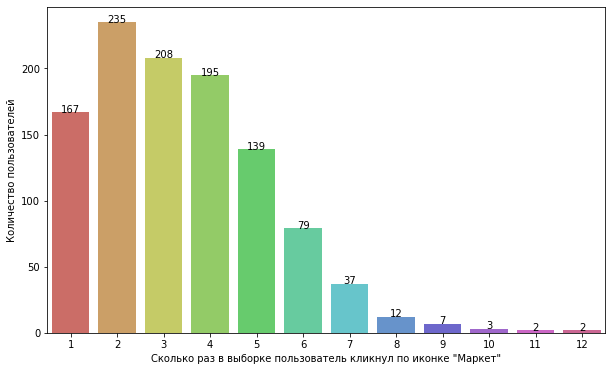

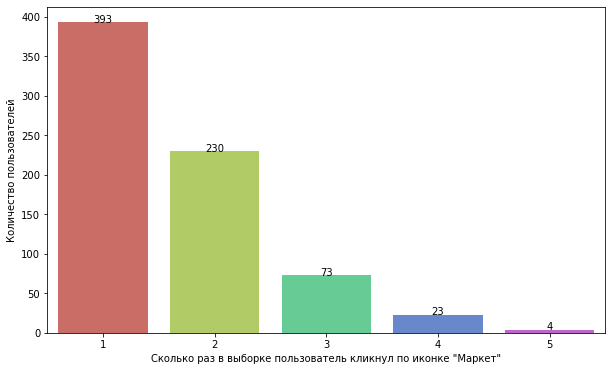

In [47]:
# Удаляем сессии без клика по "Маркет"
for i in range(len(df_exp)):
    if (df_exp['click_id'].iloc[i] != True):
        df_exp['click_id'].iloc[i] = 0
    else:
        df_exp['click_id'].iloc[i] = 1  

df_exp_notNaN=df_exp.drop(df_exp[df_exp['click_id'] == 1].index)
df_exp_notNaN['one']=1

groups_exp_notNaN = df_exp_notNaN.groupby('user_id').aggregate(sum).reset_index()
groups_exp_plot_notNaN = groups_exp_notNaN.groupby('one').count().reset_index()

plt.figure(figsize=(10,6))
p = sns.countplot(x='one',data=groups_exp_notNaN, palette='hls')
p.set_ylabel('Количество пользователей')
p.set_xlabel('Сколько раз в выборке пользователь кликнул по иконке "Маркет"')

for index,row in groups_exp_plot_notNaN.iterrows():
    p.text(row.one-1,row.experimentVariant,round(row.experimentVariant,1),color="black",ha="center")
plt.show()
    
# Оставляем только сессии без клика по "Маркет"
df_exp_NaN=df_exp.drop(df_exp[df_exp['click_id'] == 0].index)
df_exp_NaN['one']=1

groups_exp_NaN = df_exp_NaN.groupby('user_id').aggregate(sum).reset_index()
groups_exp_plot_NaN = groups_exp_NaN.groupby('one').count().reset_index()

plt.figure(figsize=(10,6))
p = sns.countplot(x='one',data=groups_exp_NaN, palette='hls')
p.set_ylabel('Количество пользователей')
p.set_xlabel('Сколько раз в выборке пользователь кликнул по иконке "Маркет"')

for index,row in groups_exp_plot_NaN.iterrows():
    p.text(row.one-1,row.experimentVariant,round(row.experimentVariant,1),color="black",ha="center")
plt.show()

### Дельты (тест - контроль)

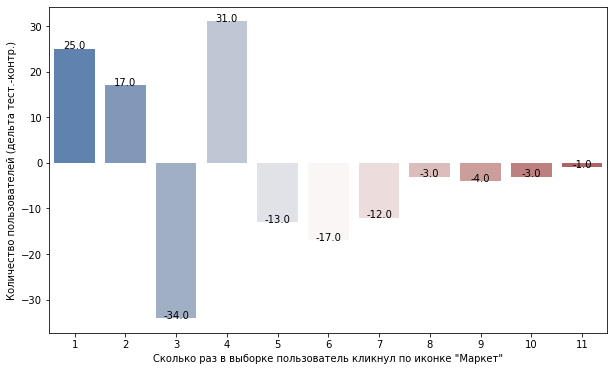

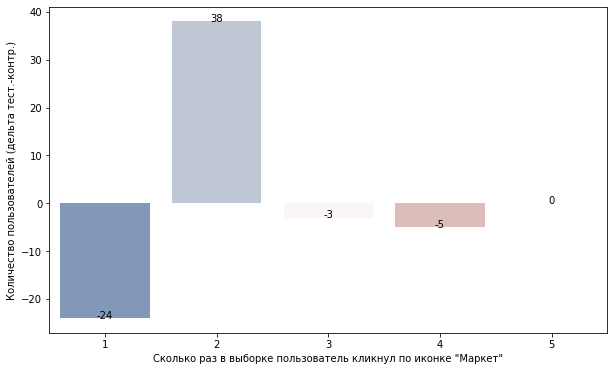

In [48]:
groups_old_plot_notNaN['delta']=groups_exp_plot_notNaN['experimentVariant']-groups_old_plot_notNaN['experimentVariant']

x = groups_old_plot_notNaN['one']
y1 = groups_old_plot_notNaN['delta']

plt.figure(figsize=(10,6))
p=sns.barplot(x=x, y=y1, palette="vlag")
p.set_ylabel('Количество пользователей (дельта тест.-контр.)')
p.set_xlabel('Сколько раз в выборке пользователь кликнул по иконке "Маркет"')

for index,row in groups_old_plot_notNaN.iterrows():
    p.text(row.one-1,row.delta,round(row.delta,1),color="black",ha="center")

plt.show()

groups_old_plot_NaN['delta']=groups_exp_plot_NaN['experimentVariant']-groups_old_plot_NaN['experimentVariant']

x = groups_old_plot_NaN['one']
y1 = groups_old_plot_NaN['delta']

plt.figure(figsize=(10,6))
p=sns.barplot(x=x, y=y1, palette="vlag")
p.set_ylabel('Количество пользователей (дельта тест.-контр.)')
p.set_xlabel('Сколько раз в выборке пользователь кликнул по иконке "Маркет"')

for index,row in groups_old_plot_NaN.iterrows():
    p.text(row.one-1,row.delta,round(row.delta,1),color="black",ha="center")

plt.show()

## Считаем значения Хи-квадрат

In [49]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

df_hitest=df['click_id'].copy(deep=True)

df_hitest=df_hitest.isnull()
     
for i in range(len(df)):
    if (df_hitest.iloc[i] != True):
        df_hitest.iloc[i] = 1
    else:
        df_hitest.iloc[i] = 0           
        
df_hitest=df_hitest.astype(int)

ct=pd.crosstab(df_hitest,df['experimentVariant'])

stat, p, dof, expected = chi2_contingency(ct)

In [50]:
prob = [0.9,0.95,0.99]

for i in range(3):
    critical = chi2.ppf(prob[i], dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob[i], critical, stat))
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

probability=0.900, critical=nan, stat=0.000
Independent (fail to reject H0)
probability=0.950, critical=nan, stat=0.000
Independent (fail to reject H0)
probability=0.990, critical=nan, stat=0.000
Independent (fail to reject H0)
